# Requirements

In [194]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## The Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [199]:
data = pd.read_csv("spotify_songs.csv")
data.sample(3)

danceability  energy  loudness  speechiness  acousticness  \
10689         0.807   0.681    -6.268          NaN       0.42300   
12267         0.267   0.953    -4.899        0.096       0.00211   
16228           NaN   0.734    -6.423          NaN       0.00719   

       instrumentalness  liveness  valence    tempo  genre  
10689               0.0    0.0962    0.676      NaN    rap  
12267               0.0    0.2830    0.568   84.989   rock  
16228               NaN    0.3400      NaN  123.033  latin

Preprocess the input and the output variables appropriately.

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29171 non-null  float64
 1   energy            21572 non-null  float64
 2   loudness          25213 non-null  float64
 3   speechiness       30472 non-null  float64
 4   acousticness      31939 non-null  float64
 5   instrumentalness  26363 non-null  float64
 6   liveness          29847 non-null  float64
 7   valence           25344 non-null  float64
 8   tempo             26276 non-null  float64
 9   genre             32833 non-null  object 
dtypes: float64(9), object(1)
memory usage: 2.5+ MB


Explore the dataset using visualizations of your choice.

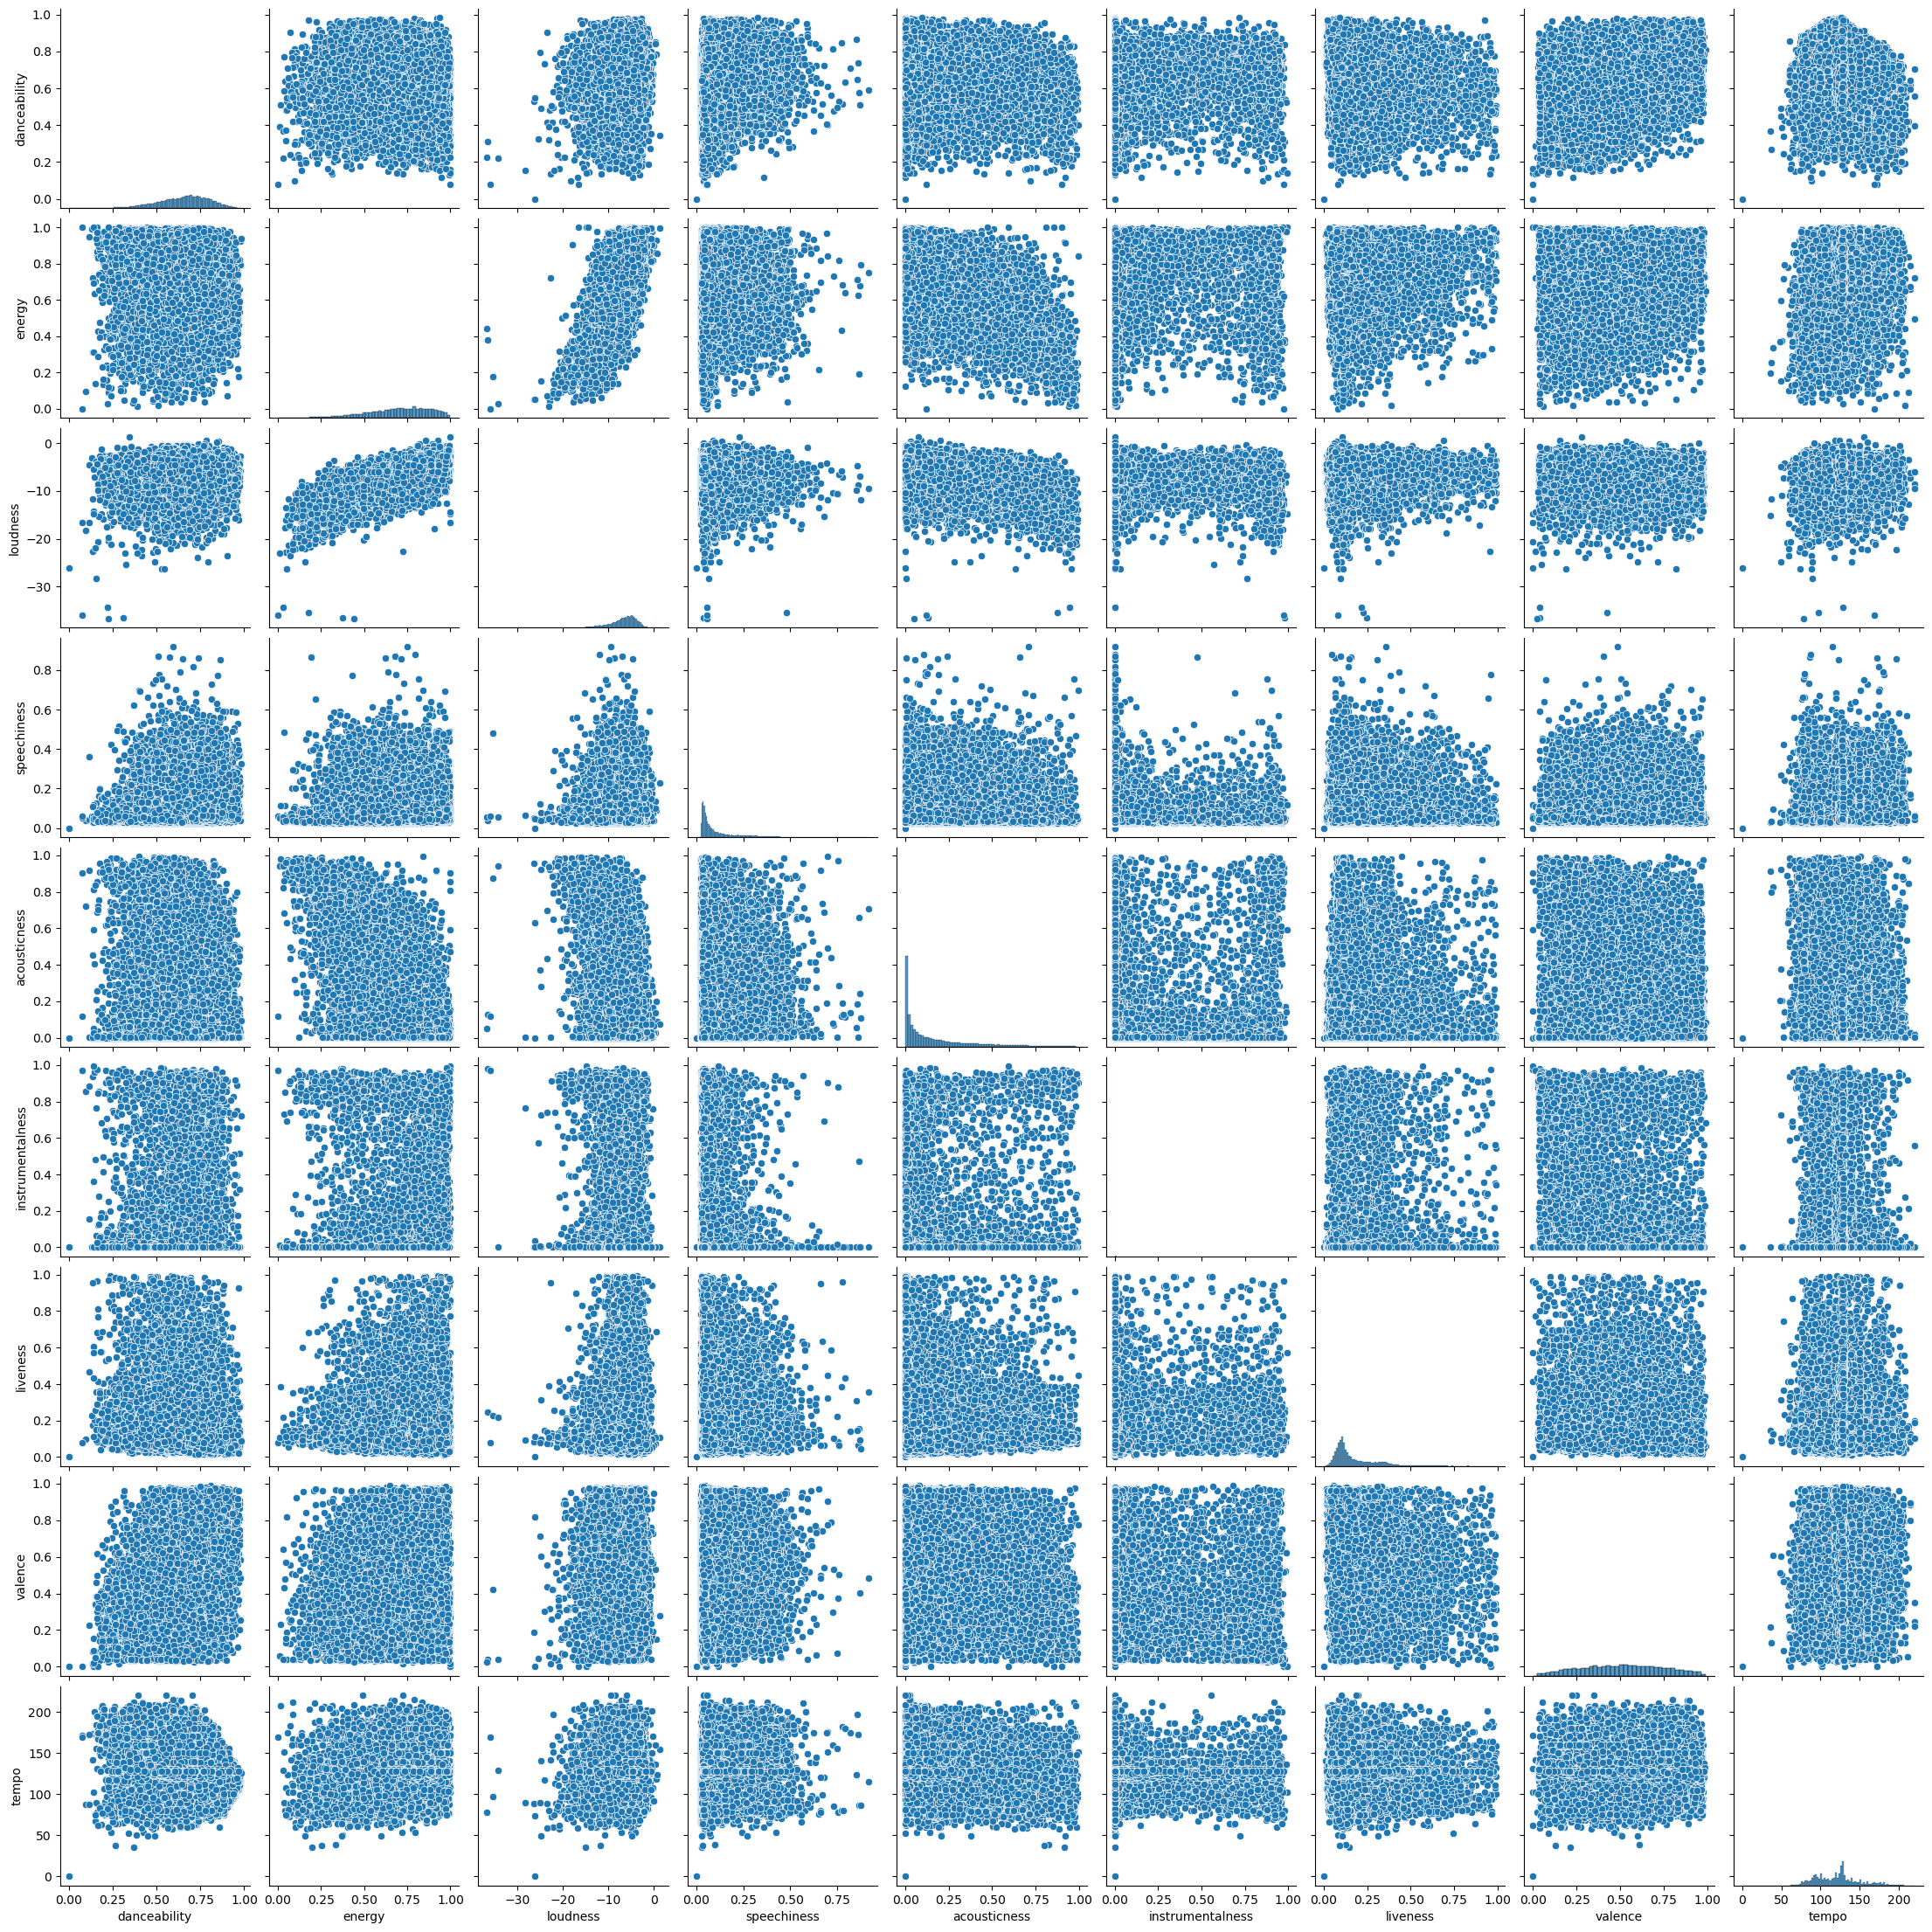

In [203]:
sns.pairplot(data)

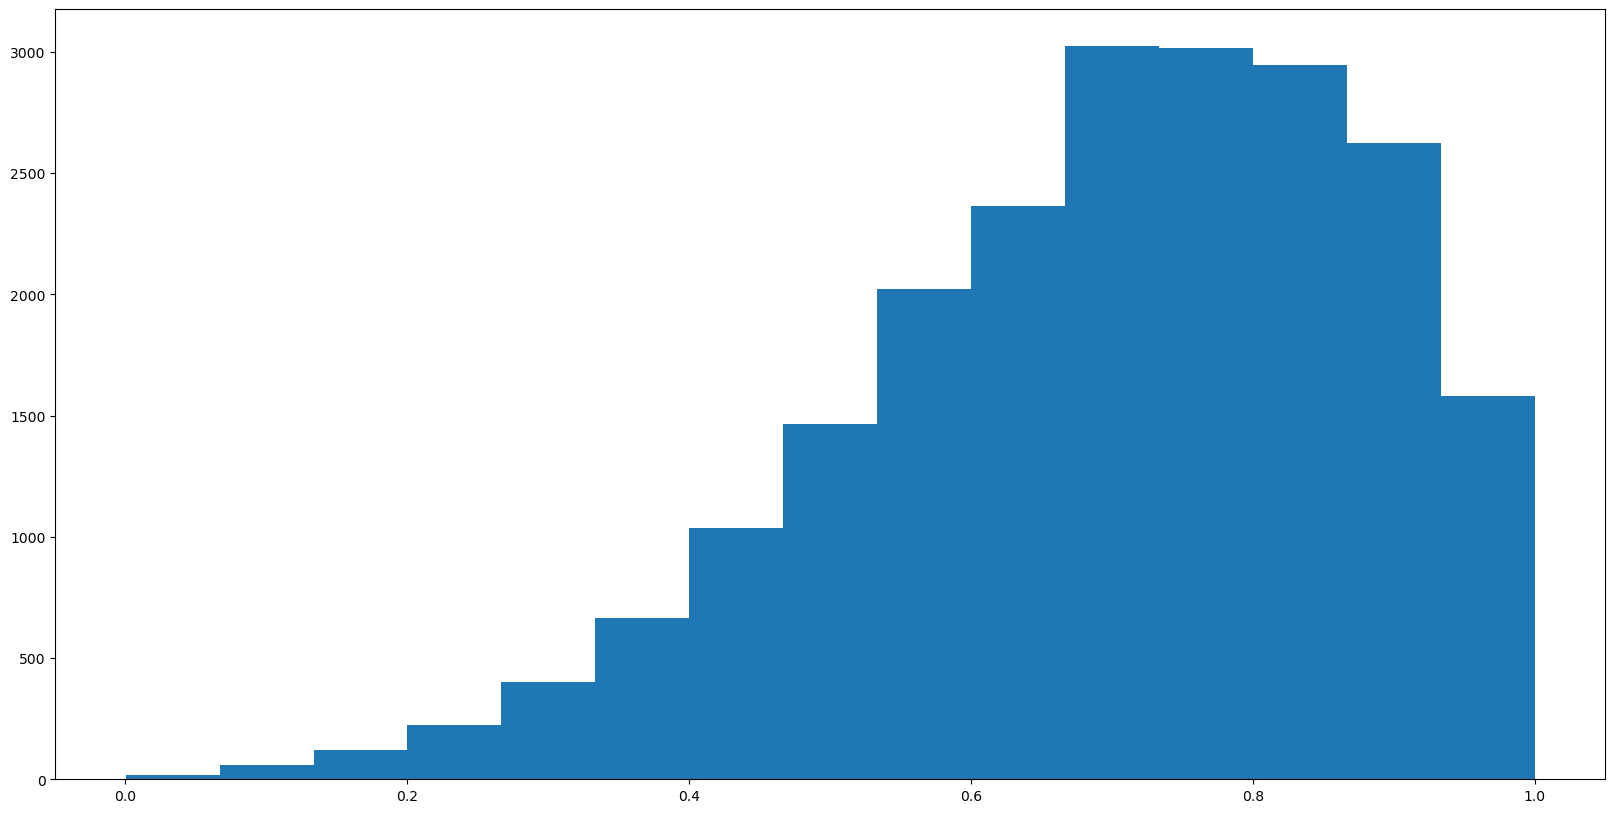

In [204]:
plt.figure(figsize=(20, 10))
plt.hist(data['energy'], bins=15)
plt.show()

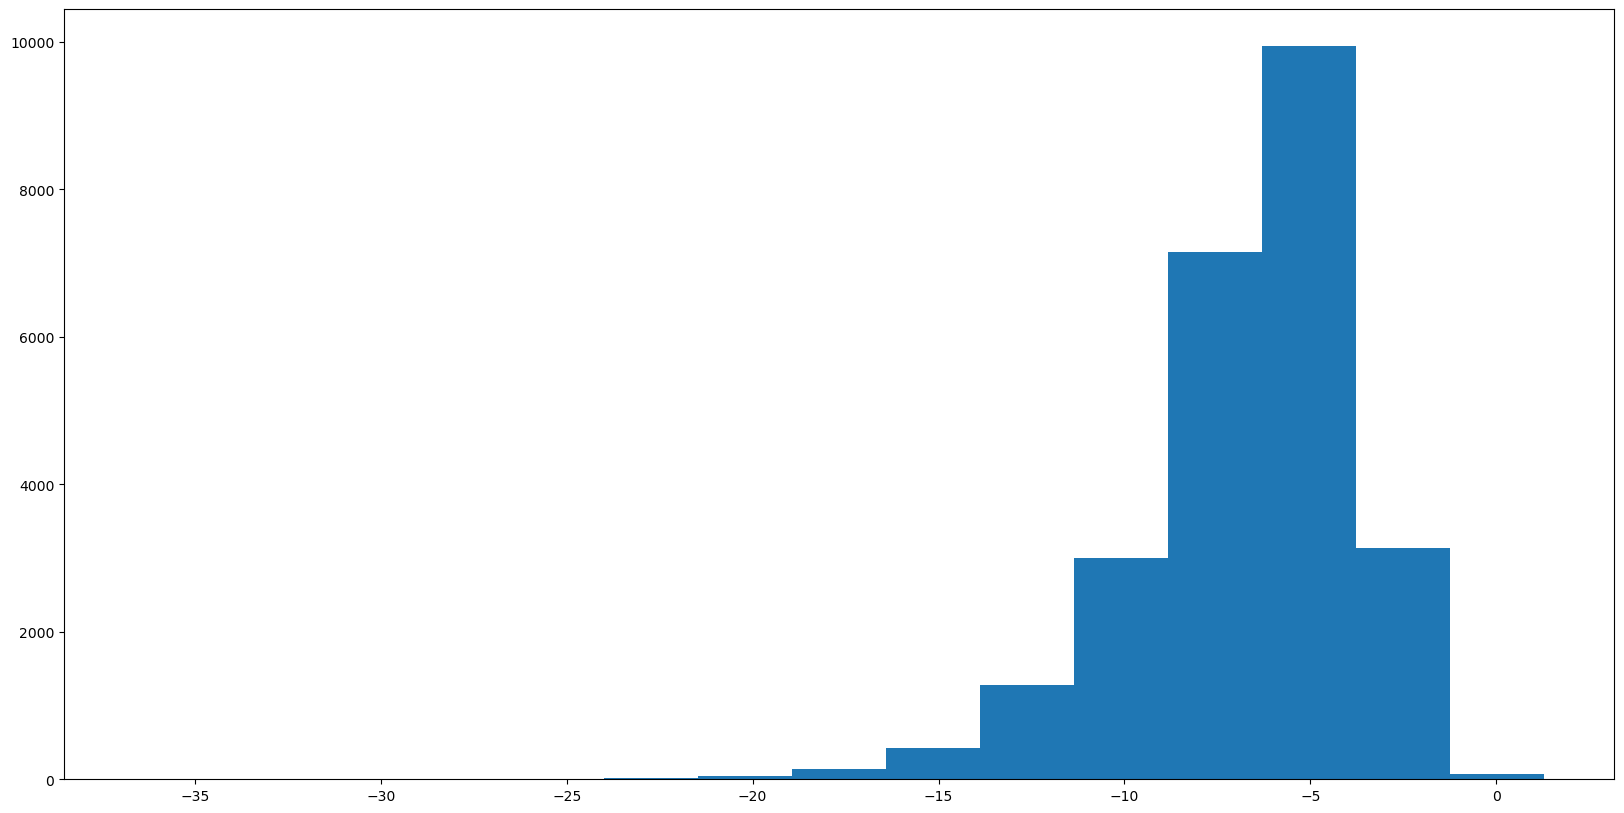

In [205]:
plt.figure(figsize=(20, 10))
plt.hist(data['loudness'], bins=15)
plt.show()

<Axes: >

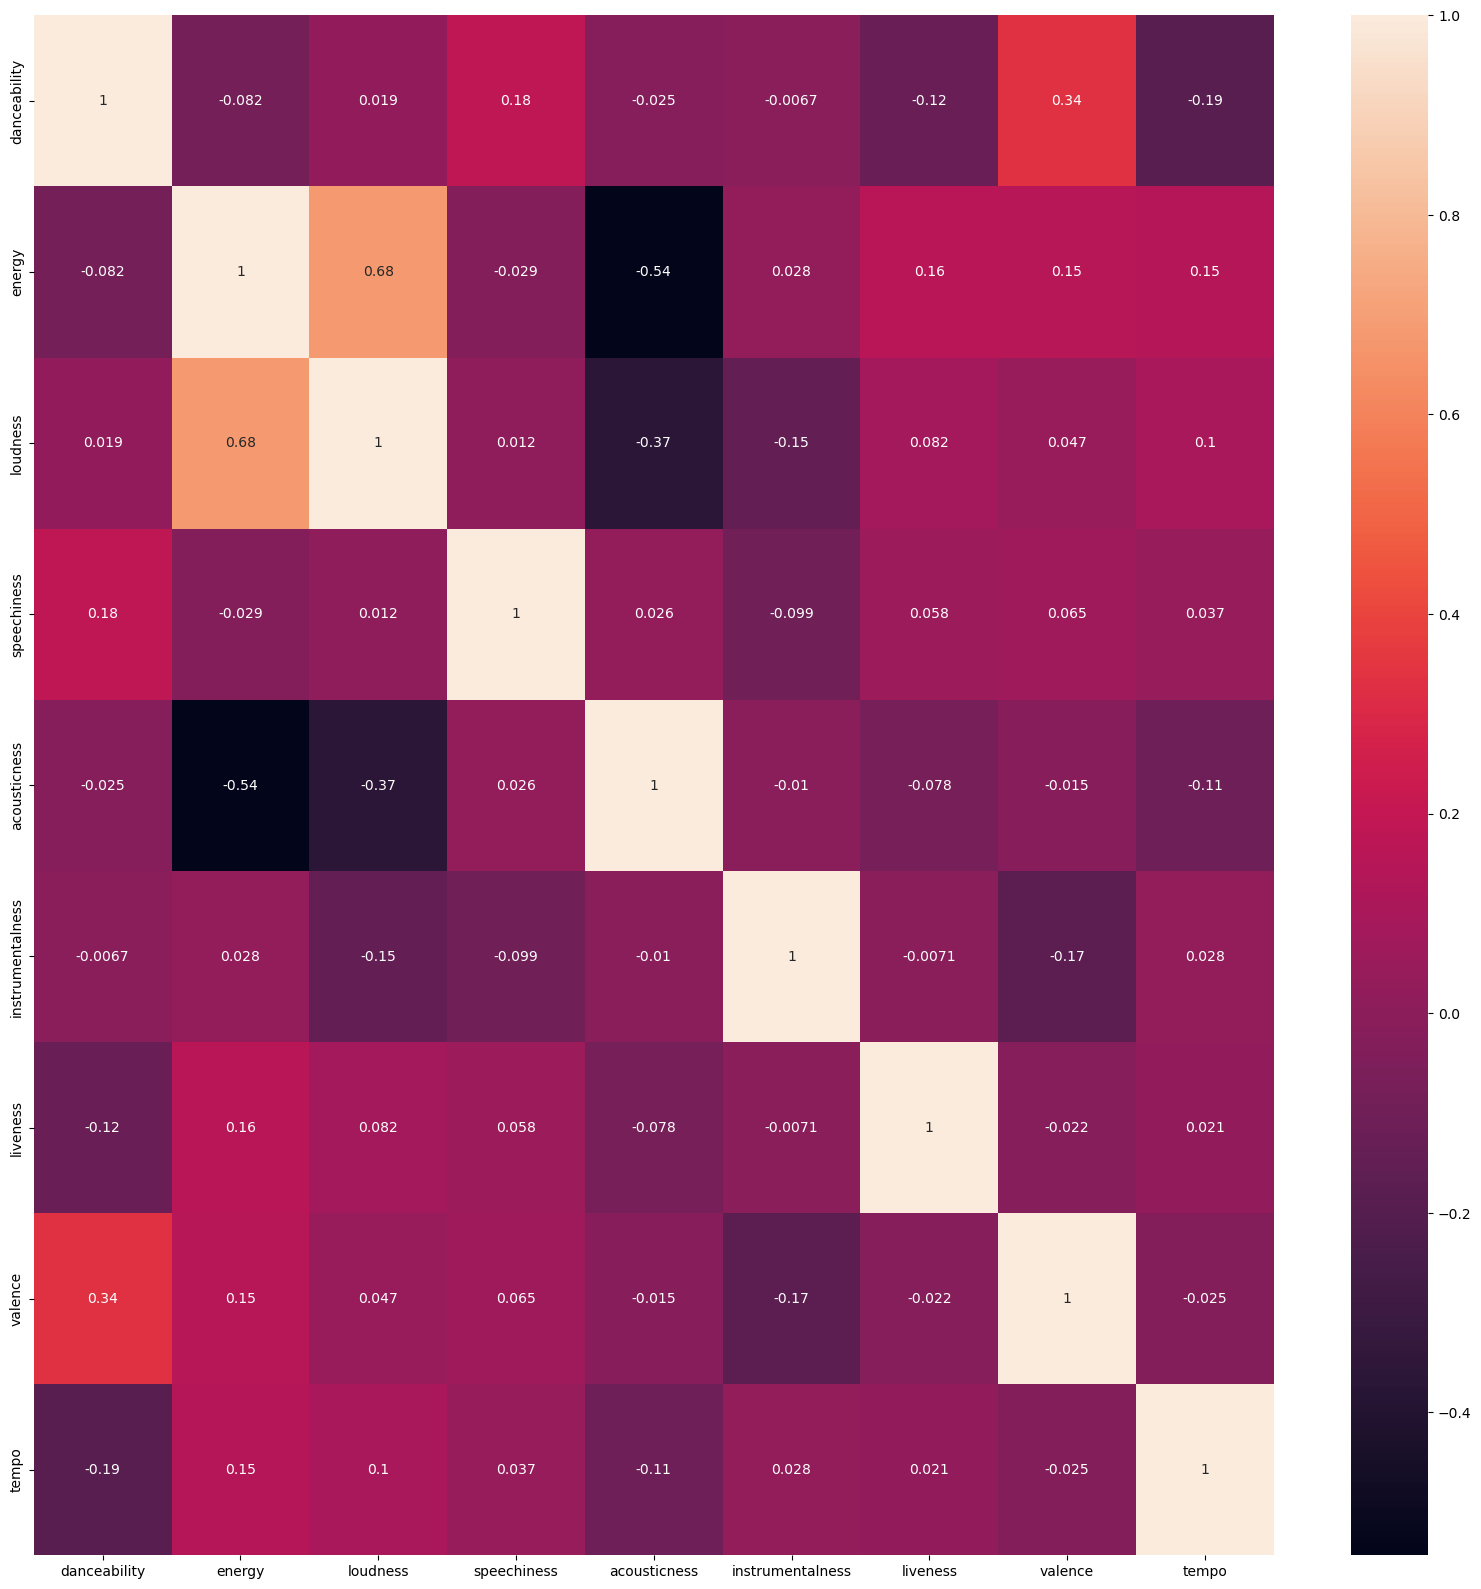

In [206]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['genre']).corr(), annot=True) 

Check if the dataset is balanced.

Genre Distribution
genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64


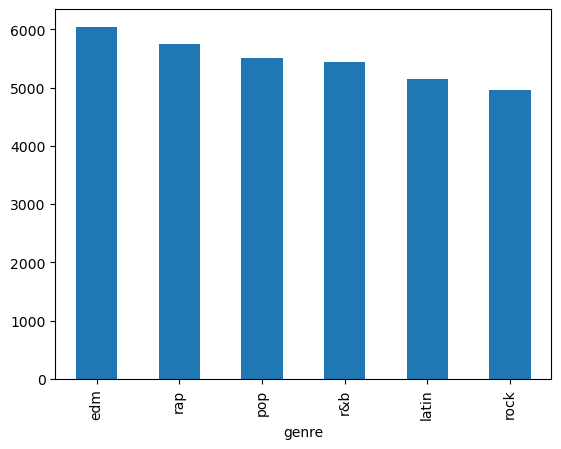

In [208]:
genre_counts=data['genre'].value_counts().plot.bar()
print("Genre Distribution")
print(data['genre'].value_counts())

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [210]:
missing_percent = data.isnull().sum() / len(data) * 100
missing_percent = missing_percent.reset_index().rename(columns={"index": "column", 0: "percent missing"})
missing_percent

column  percent missing
0      danceability        11.153413
1            energy        34.297810
2          loudness        23.208357
3       speechiness         7.190936
4      acousticness         2.722870
5  instrumentalness        19.705784
6          liveness         9.094509
7           valence        22.809369
8             tempo        19.970761
9             genre         0.000000

In [211]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness          894
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

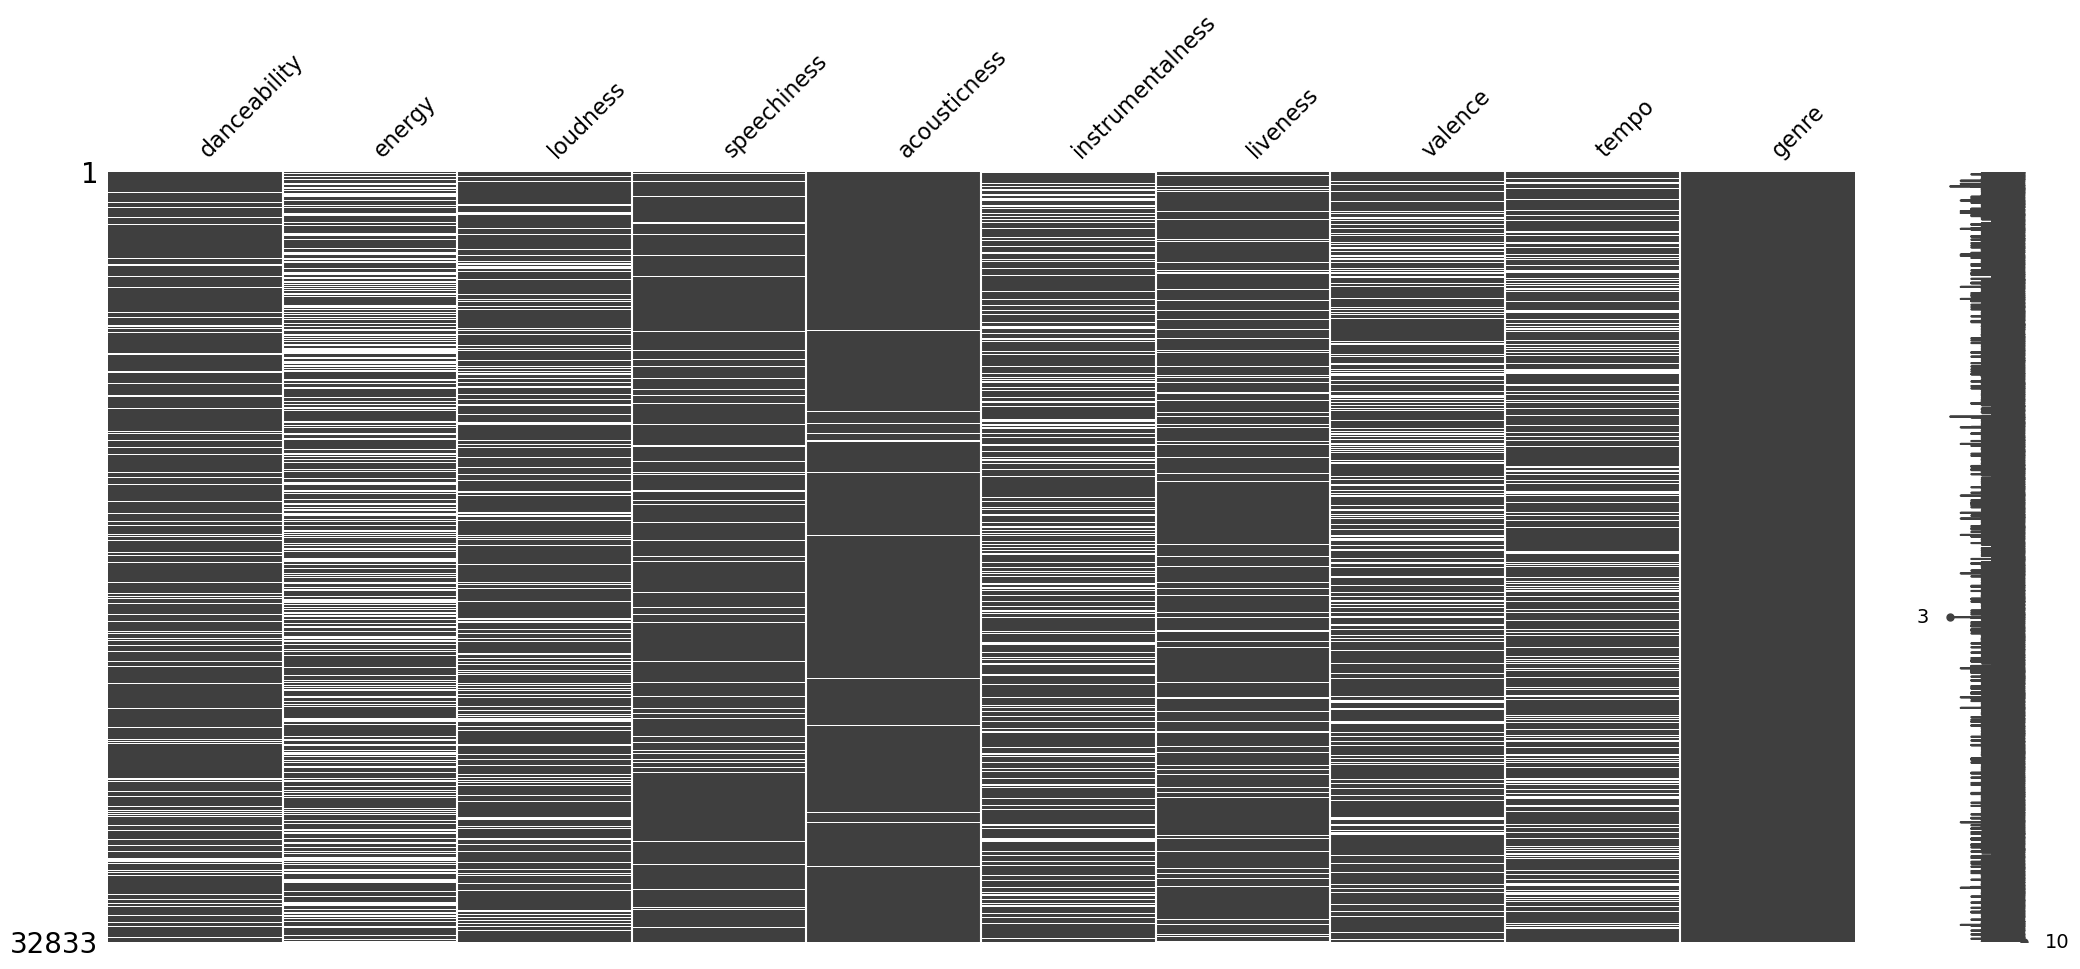

In [213]:
msno.matrix(data)
plt.show()

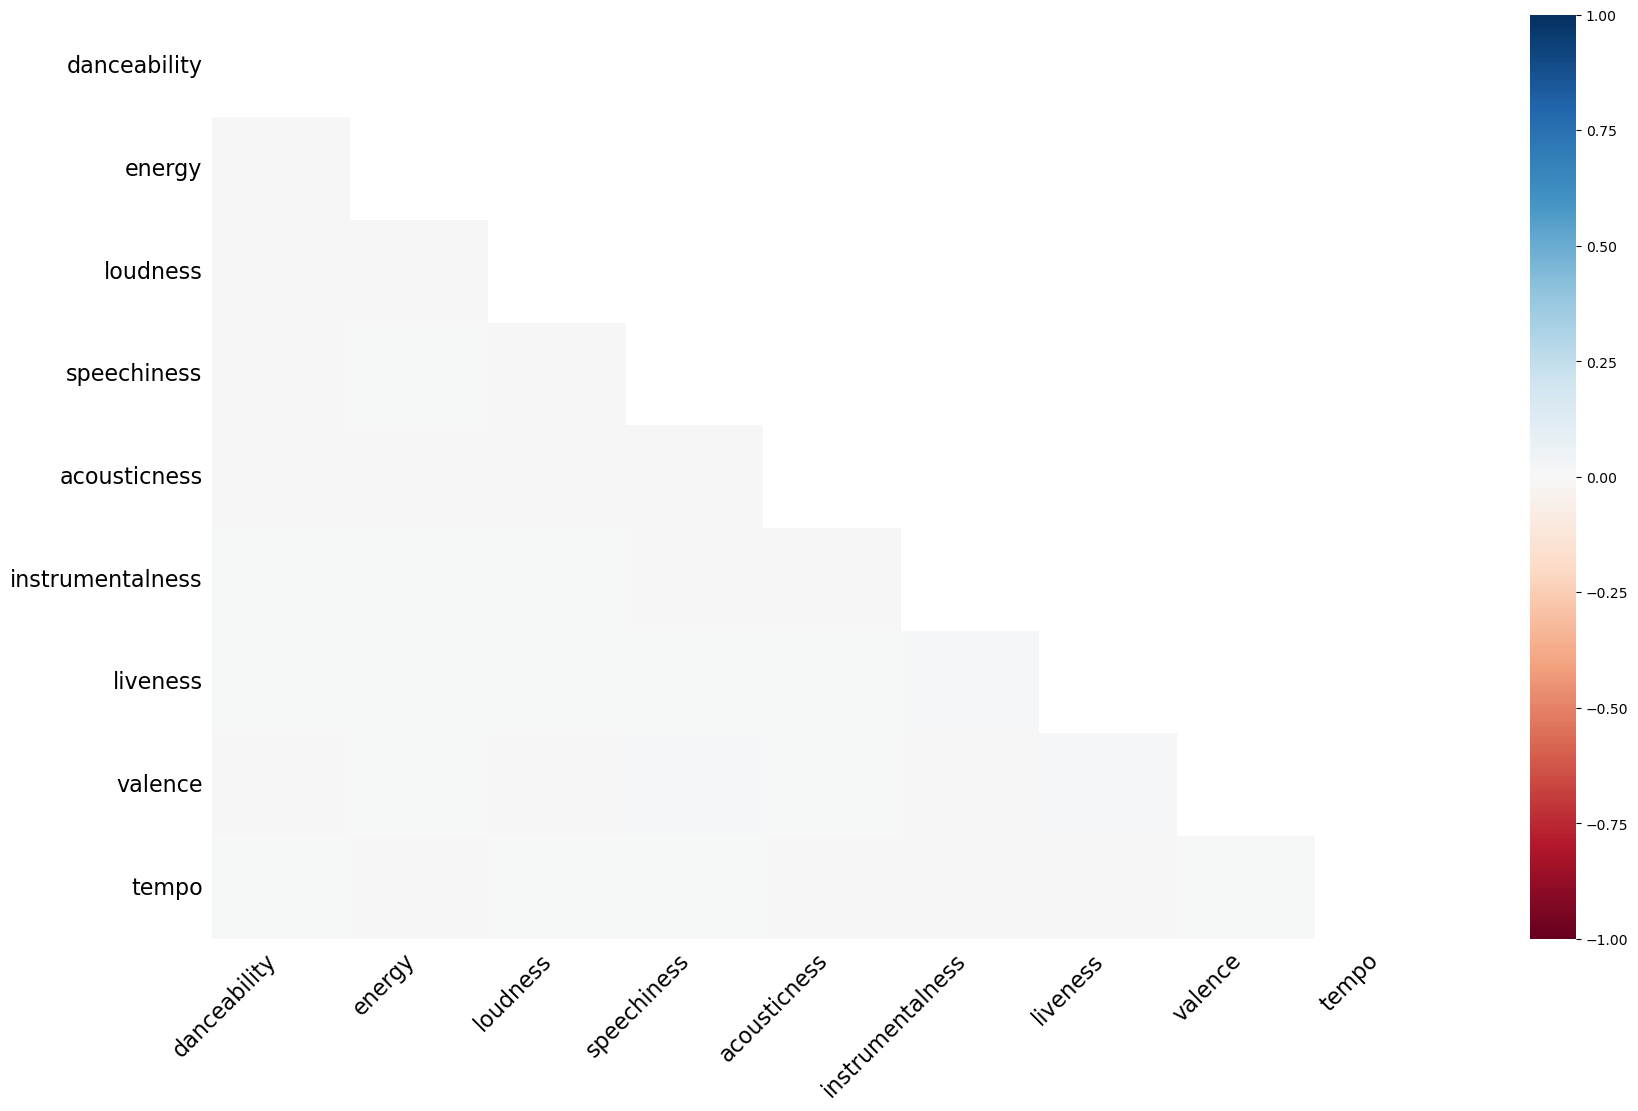

In [214]:
msno.heatmap(data)
plt.show()

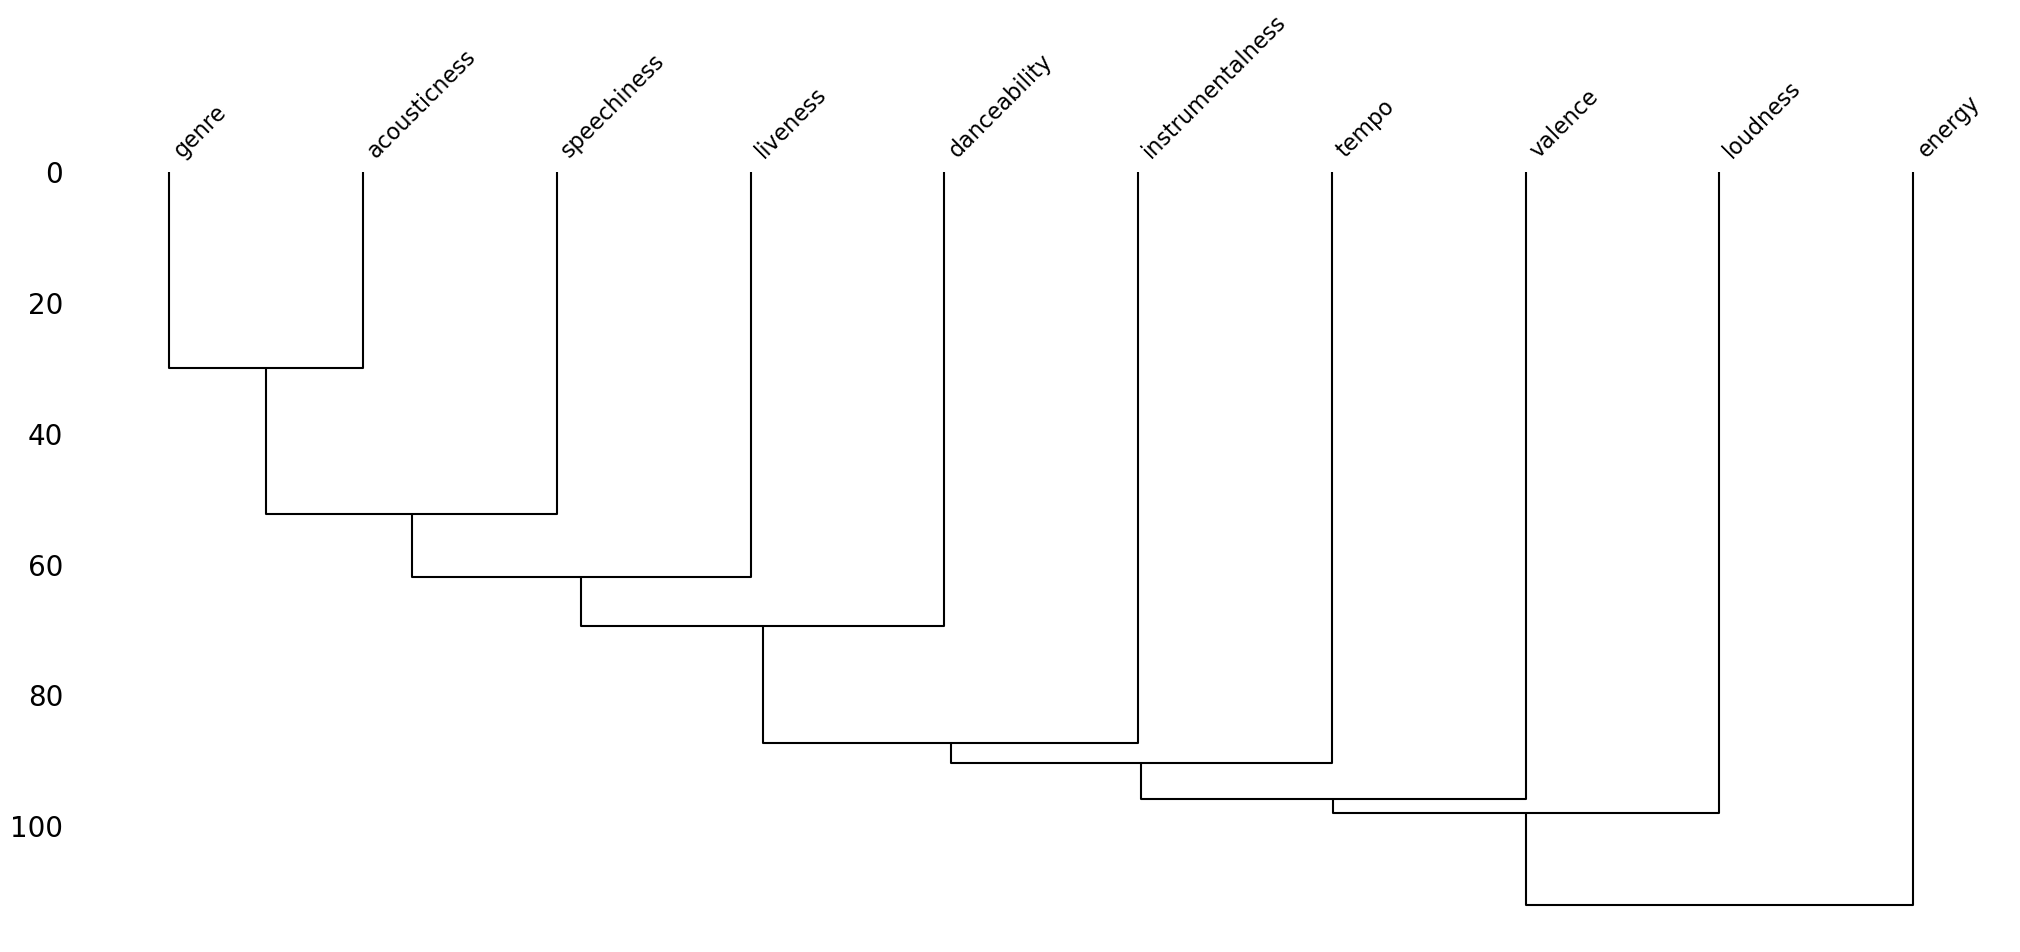

In [215]:
msno.dendrogram(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

#### do 5% ubavo e so MEAN/MEDIAN

In [218]:
data.acousticness = data.acousticness.fillna(data.acousticness.mean())

In [219]:
data.isnull().sum()

danceability         3662
energy              11261
loudness             7620
speechiness          2361
acousticness            0
instrumentalness     6470
liveness             2986
valence              7489
tempo                6557
genre                   0
dtype: int64

#### od 5-20% KNN

In [221]:
columnsToTransform=['danceability','speechiness','instrumentalness','tempo','liveness']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[columnsToTransform])
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(scaled_data)
imputed_data = scaler.inverse_transform(imputed_data)
data[columnsToTransform]=imputed_data

In [222]:
data.isnull().sum()

danceability            0
energy              11261
loudness             7620
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence              7489
tempo                   0
genre                   0
dtype: int64

In [223]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### nad 20% so knn ili vo slucajot MICE

In [225]:
columnsToTransform=['valence','energy','loudness']
mice = IterativeImputer()
imputed_values = mice.fit_transform(data[columnsToTransform])
data[columnsToTransform] = imputed_values

In [226]:
data.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [227]:
data.sample(3)

danceability    energy  loudness  speechiness  acousticness  \
675           0.387  0.693000    -7.865       0.0589       0.18200   
20754         0.798  0.991416    -0.582       0.0375       0.01270   
1270          0.601  0.794000    -5.844       0.0671       0.00987   

       instrumentalness  liveness   valence    tempo  genre  
675            0.000000     0.171  0.533401  149.187    pop  
20754          0.000024     0.126  0.590000   96.005  latin  
1270           0.000001     0.388  0.244000  114.066    pop

In [228]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['genre'])
data['genre'] = encoded_values

In [229]:
data.sample(3)

danceability  energy  loudness  speechiness  acousticness  \
28485         0.612   0.926    -3.952       0.0546       0.00131   
18021         0.688   0.896    -5.186       0.0388       0.08100   
30838         0.510   0.769    -6.662       0.0321       0.00487   

       instrumentalness  liveness  valence     tempo  genre  
28485          0.000048     0.238    0.145  118.6636      0  
18021          0.000006     0.327    0.916  131.1994      1  
30838          0.000457     0.250    0.243   91.9690      0

In [230]:
encoder.classes_

array(['edm', 'latin', 'pop', 'r&b', 'rap', 'rock'], dtype=object)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [232]:
dataCopy=data.copy()
target = 'genre'
X=dataCopy.drop([target],axis=1)
Y = data[target]

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Feature Scaling
Standardize the features appropriately.

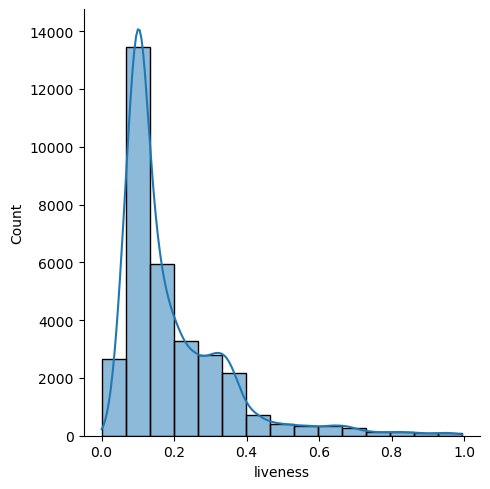

In [123]:
sns.displot(data['liveness'], kde=True, bins=15)
plt.show()

In [290]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [294]:
from sklearn.metrics import f1_score,classification_report

In [296]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

Use the trained model to make predictions for the test set.

In [299]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [302]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.60      0.51      1218
           1       0.32      0.36      0.34      1033
           2       0.24      0.24      0.24      1081
           3       0.32      0.29      0.31      1031
           4       0.51      0.39      0.44      1168
           5       0.57      0.46      0.51      1036

    accuracy                           0.40      6567
   macro avg       0.40      0.39      0.39      6567
weighted avg       0.40      0.40      0.40      6567



In [304]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [306]:
model.fit(X_train,Y_train)

LogisticRegression()

In [308]:
y_pred = model.predict(X_test)

In [310]:
from sklearn.metrics import f1_score,classification_report

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51      1218
           1       0.36      0.33      0.35      1033
           2       0.32      0.23      0.27      1081
           3       0.36      0.31      0.33      1031
           4       0.50      0.50      0.50      1168
           5       0.48      0.57      0.52      1036

    accuracy                           0.43      6567
   macro avg       0.41      0.42      0.41      6567
weighted avg       0.42      0.43      0.42      6567



In [157]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.3/124.9 MB 3.2 MB/s eta 0:00:40
   ---------------------------------------- 0.6/124.9 MB 5.1 MB/s eta 0:00:25
   ---------------------------------------- 1.0/124.9 MB 6.0 MB/s eta 0:00:21
   ---------------------------------------- 1.6/124.9 MB 7.1 MB/s eta 0:00:18
    --------------------------------------- 2.1/124.9 MB 7.8 MB/s eta 0:00:16
    --------------------------------------- 2.4/124.9 MB 8.0 MB/s eta 0:00:16
    --------------------------------------- 2.9/124.9 MB 8.2 MB/s eta 0:00:15
   - -------------------------------------- 3.4/124.9 MB 8.6 MB/s eta 0:00:15
   - -------------------------------------- 4.0/124.9 MB 8.8 MB/s eta 0:00:14
   - -------------------------------------- 4.5/124.9 MB 9.0 MB/s eta 0:00:14
   - -------------------------------------- 4.9/124.9 MB 8.9 MB/s eta

In [332]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,min_child_weight=1,n_estimators=500)

In [334]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)


In [336]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61      1218
           1       0.42      0.34      0.38      1033
           2       0.32      0.29      0.30      1081
           3       0.37      0.37      0.37      1031
           4       0.52      0.58      0.55      1168
           5       0.60      0.65      0.62      1036

    accuracy                           0.48      6567
   macro avg       0.47      0.48      0.47      6567
weighted avg       0.47      0.48      0.48      6567



In [338]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [356]:
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.3563270899954317


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [370]:
dataCopy=data.copy()
target = 'genre'
X=dataCopy.drop([target],axis=1)
Y = data[target]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=42)

## Feature Scaling
Standardize the features appropriately.

In [372]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [378]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='f1_macro',  # Choose the evaluation metric
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, Y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Best F1 score:  0.4802283184091796


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [396]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# For binary classification
fpr, tpr, thresholds = roc_curve(Y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

NameError: name 'best_model' is not defined